## theory

Dehnen profiles projection $S(\eta)$ and $N(\eta)$

Considering Dehnen model, density of the system is

$$\rho (r) = \rho_0 (r/a)^{-\gamma} (1 + r/a)^{4-\gamma}$$

When projected onto a plane, we have

$$\Sigma(R) = 2\int_0^\infty dz \rho(r) = 2\rho_0 a S(R/a) $$

Then we calculate $S(\eta)$, which is independent of $a$ and $\rho_0$
$$S(\eta) = \int_0^\infty d\zeta (\zeta^2 + \eta^2)^{-\gamma / 2} (1+(\zeta^2 + \eta^2)^{1/2})^{\gamma-4}$$

where $\eta = \frac{R}{a}$, $\zeta = \frac{z}{a}$

We can also derive formula for cumulative density distribution

$$M(R) = 2 \pi \int_0^R dR' R' \Sigma(R') =  4 \pi \rho_0 a^{3} N(R/a)$$


$$N(\eta) = \int_0^\eta d\eta' \eta' S(\eta')$$


## imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

from scipy import integrate

## input reference data, calculated by Evgeny

In [2]:
S = pd.read_csv(r'./data/dehnen_s.dat', delimiter='\s+')
N = pd.read_csv(r'./data/dehnen_n.dat', delimiter='\s+')

## initialization

In [3]:
a = 5
ro0 = 10
gammas = np.arange(0, 3, 0.5)

eta = S['eta'] #np.linspace(1e-5, 100, 1001)
zeta = np.geomspace(1e-10, 30000, 10001)
ETA, ZETA = np.meshgrid(eta, zeta)

In [4]:
S_ = pd.DataFrame(data={'eta' : eta})
N_ = pd.DataFrame(data={'eta' : eta[1:]})

## S and N calculation

In [5]:
for gamma in gammas:
    S_[f'gamma={gamma}'] = integrate.simps(np.power(ZETA ** 2 + ETA ** 2, - gamma/2) * np.power(1 + np.sqrt(ZETA ** 2 + ETA ** 2), gamma - 4), x=zeta, axis=0)

In [6]:
N_array = []
for gamma in gammas:
    for i in range(1, len(eta)):
        N_array.append(integrate.simps(eta[:i] * S_.loc[:i-1,f'gamma={gamma}'], x=eta[:i]))
    N_[f'gamma={gamma}'] = N_array
    N_array = []

## plot

In [7]:
colors = ['red', 'blue', 'orange', 'green', 'brown', 'purple']

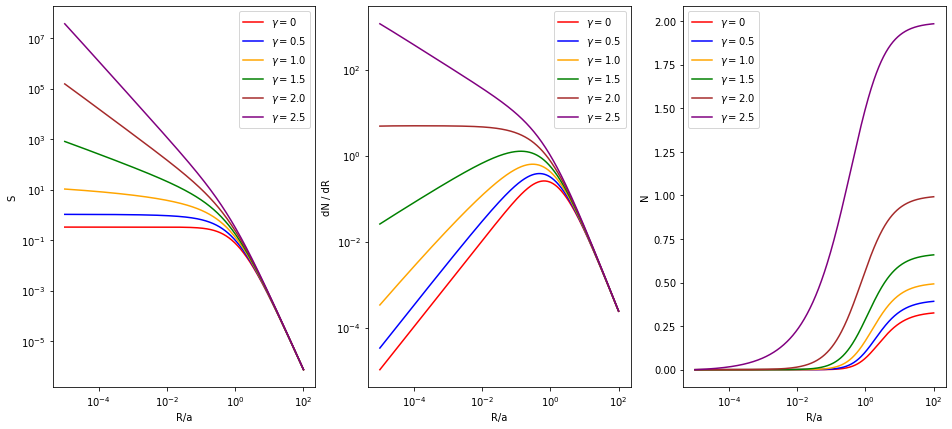

In [8]:
fig = plt.figure(figsize=(16,7))
spec = gridspec.GridSpec(ncols=3, nrows=1)

### figure 0: S(\eta)

ax0 = fig.add_subplot(spec[0])

for i, g in enumerate(S.columns[1:]):
    ax0.plot(S['eta'], S[g],  label=f'$\{g}$', c=colors[i])
    
# for i, g in enumerate(S_.columns[1:]):
#     ax0.plot(S_['eta'], S_[g], label=f'$\{g}$ Olya', c=colors[i], ls='-.')


ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('R/a')
ax0.set_ylabel('S')
ax0.legend()


### figure 1: dN/dR(\eta)
ax1 = fig.add_subplot(spec[1])

for i, g in enumerate(S.columns[1:]):
    ax1.plot(S['eta'], S[g] * np.pi * S['eta'], label=f'$\{g}$', c=colors[i])
    
# for i, g in enumerate(S_.columns[1:]):
#     ax1.plot(S_['eta'], S_[g] * np.pi * S['eta'],   label=f'$\{g}$ Olya', c=colors[i], ls='-.')


ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('R/a')
ax1.set_ylabel('dN / dR')
ax1.legend()


### figure 1: n(\eta)

ax2 = fig.add_subplot(spec[2])

for i, g in enumerate(N.columns[1:]):
    ax2.plot(N['eta'], N[g],   label=f'$\{g}$', c=colors[i])
    
# for i, g in enumerate(N_.columns[1:]):
#     ax2.plot(N_['eta'], N_[g],   label=f'$\{g}$ Olya', c=colors[i], ls='-.')


ax2.set_xscale('log')

ax2.set_xlabel('R/a')
ax2.set_ylabel('N')

ax2.legend()

                